# Antibody binding kinetics
## Objective: Undertsand Ab and Ag binding, and the effect of k_on and k_off on assay design

## consider buying "Partial Differential Equation Analysis in Biomedical Engineering"

## Discussion exercise - calculate kon based on experimental data

In [2]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

## The rate of change of the concentration of bound antibody-antigen complex (AbAg) with respect to time (t) can be expressed as:

$\frac{d[AbAg]}{dt} = k_{on} \cdot [Ab] \cdot [A] - k_{off} \cdot [AbAg]$

Where:
- $\frac{d[AbAg]}{dt}$ is the rate of change of $AbAg$ concentration with respect to time $t$.
- $k_{on}$ is the association rate constant (1/(M*s)).
- $k_{off}$ is the dissociation rate constant (1/s).
- $[Ab]$ is the concentration of free antibody (M).
- $[A]$ is the concentration of free antigen (M).
- $[AbAg]$ is the concentration of the bound antibody-antigen complex (M).


## Typical Antibody concentrations are between 0.1-1.0 μg/ml

### We will need to convert between g and moles
**Step 1: Determine the Molecular Weight (MW) of the Antibody**

The molecular weight of an antibody can vary depending on its specific amino acid sequence and post-translational modifications. For this example, let's assume the molecular weight of the antibody is 150,000 g/mol.

**Step 2: Convert Mass to Moles**

Suppose you have an antibody solution with a concentration of 1 µg/mL.

1 µg = $1 \times 10^{-6}$ grams

Now, calculate the number of moles (n) using the formula:

$ n = \frac{\text{Mass (g)}}{\text{Molecular Weight (g/mol)}}$

Substitute the values:

$ n = \frac{1 \times 10^{-6} \, \text{g}}{150,000 \, \text{g/mol}} = 6.67 \times 10^{-12} \, \text{mol} $

**Step 3: Express Concentration in Molarity**

Suppose you have 1 mL of the antibody solution (0.001 L). To express the concentration in molarity (M), divide the number of moles by the volume in liters:

$ \text{Molarity (M)} = \frac{n}{V} $

Substitute the values:

$ \text{Molarity (M)} = \frac{6.67 \times 10^{-12} \, \text{mol}}{0.001 \, \text{L}} = 6.67 \times 10^{-9} \, \text{M} $

So, the concentration of the antibody solution is approximately 6.67 x 10^-9 M when converted from 1 µg/mL.


## Typical k_on and k_off Values

### Monoclonal Antibodies:

- Monoclonal antibodies, highly specific and optimized for binding, may have higher k_on values.
- Typical k_on values for monoclonal antibodies might be in the range of 10^6 to 10^7 1/(M*s).
- Correspondingly, their k_off values would be lower, typically in the range of 10^-4 to 10^-6 1/s.

### Polyclonal Antibodies:

- Polyclonal antibodies, consisting of a mixture of different antibody clones, may have a wider range of k_on and k_off values.
- k_on and k_off values for polyclonal antibodies can vary significantly depending on the specific antibodies present in the mixture.

### Temperature and Experimental Conditions:

- Temperature plays a crucial role in antibody-antigen interactions. Higher temperatures generally result in higher k_on and k_off values.
- The presence of ions, pH, and buffer conditions can also affect binding kinetics.

It's important to note that these values are general estimates, and the actual values can vary widely based on the specific antibodies and antigens involved. Experimental techniques such as surface plasmon resonance (SPR) and bio-layer interferometry (BLI) are commonly used to measure k_on and k_off values experimentally for a given antibody-antigen pair. Researchers typically characterize the binding kinetics of antibodies for specific applications, such as drug development, diagnostics, and immunoassays, to ensure optimal performance in their intended use cases.


## This is the real condition - solved using solvers and not making assumptions
### Future Iain - start with edge cases, then present full solution. Compare - when do assumptions break down?

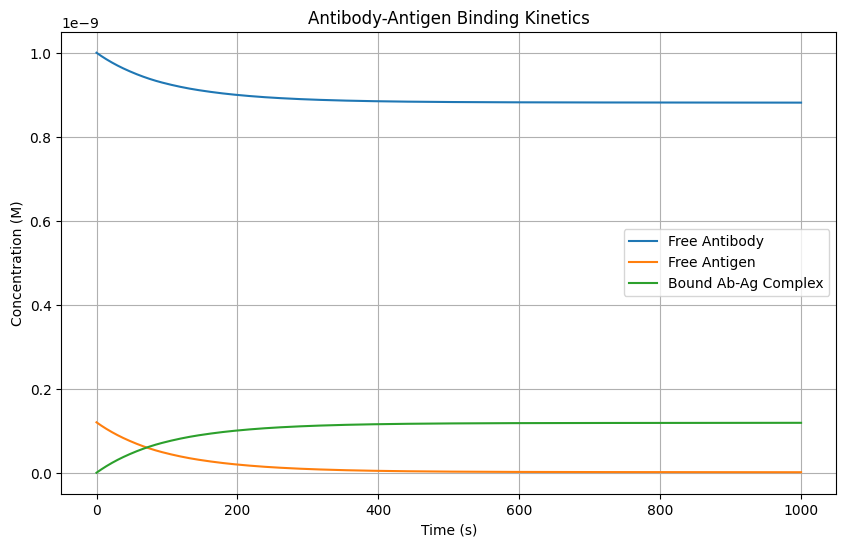

In [3]:
# Initial concentrations (M)
Ab0 = 1e-9  # Initial concentration of free antibody
A0 = 1.2e-10   # Initial concentration of free antigen
AbAg0 = 0.0 # Initial concentration of bound antibody-antigen complex

# Define the rate constants
kon = 1e7 # Association rate constant (1/(M*s))
koff = 1e-4  # Dissociation rate constant (1/s)

# Time points (s)
t = np.linspace(0, 1000, 1000)  # Time from 0 to 1000 seconds

# Define the differential equations
def kinetics(y, t):
    Ab, A, AbAg = y
    dAbdt = -kon * Ab * A + koff * AbAg
    dAdt = -kon * Ab * A + koff * AbAg
    dAbAgdt = kon * Ab * A - koff * AbAg
    return [dAbdt, dAdt, dAbAgdt]

# Initial conditions
y0 = [Ab0, A0, AbAg0]

# Solve the differential equations
solution = odeint(kinetics, y0, t)

# Extract concentrations over time
Ab_concentration = solution[:, 0]
A_concentration = solution[:, 1]
AbAg_concentration = solution[:, 2]

# Plot the concentrations
plt.figure(figsize=(10, 6))
plt.plot(t, Ab_concentration, label='Free Antibody')
plt.plot(t, A_concentration, label='Free Antigen')
plt.plot(t, AbAg_concentration, label='Bound Ab-Ag Complex')
plt.xlabel('Time (s)')
plt.ylabel('Concentration (M)')
plt.legend()
plt.title('Antibody-Antigen Binding Kinetics')
plt.grid(True)
plt.show()


### Let's understand the relationship between half-life of the complex and the off rate

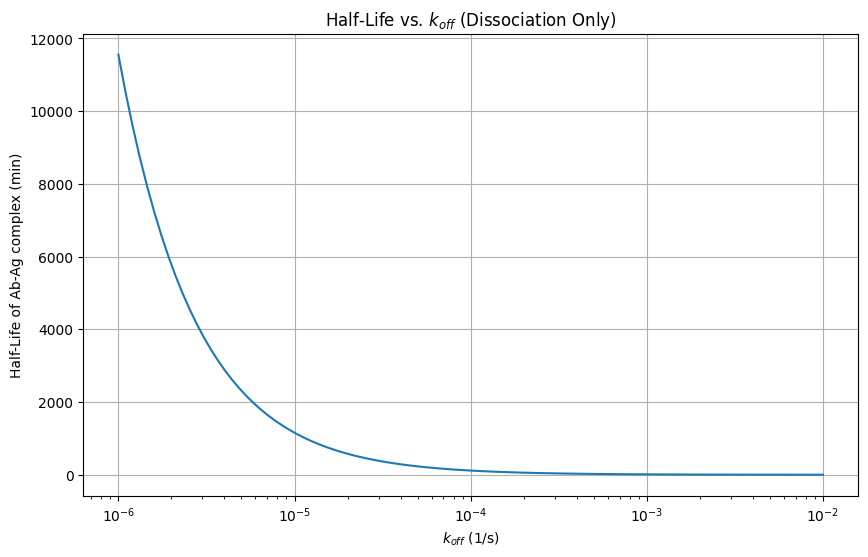

In [5]:
# Time points (s)
t = np.linspace(0, 1000, 1000)  # Time from 0 to 1000 seconds

# Define a range of koff values to test
koff_values = np.logspace(-6, -2, 100)  # Range from 1e-6 to 1e-2

# Initialize an array to store half-saturation times for each koff value
half_saturation_times = []

# Define the differential equation for Ab-Ag dissociation
def dissociation(y, t, koff):
    AbAg = y
    dAbAgdt = -koff * AbAg
    return dAbAgdt

# Iterate through different koff values and record half-saturation times
for koff in koff_values:
    # Initial concentration of bound complex (M)
    AbAg0 = 1e-9  # Initial concentration of bound Ab-Ag complex

    # Initial conditions
    y0 = [AbAg0]

    # Solve the differential equation for dissociation
    solution = odeint(dissociation, y0, t, args=(koff,))

    # Find the time when the complex concentration is reduced to half of its initial value
    half_saturation_time= -np.log(0.5)/koff/60

    half_saturation_times.append(half_saturation_time)

# Plot half-saturation times as a function of koff
plt.figure(figsize=(10, 6))
plt.semilogx(koff_values, half_saturation_times)
plt.xlabel('$k_{off}$ (1/s)')
plt.ylabel('Half-Life of Ab-Ag complex (min)')
plt.title('Half-Life vs. $k_{off}$ (Dissociation Only)')
plt.grid(True)
plt.show()

### Calculator - find the half life given a koff rate

In [6]:
# Create an input box for desired koff
desired_koff_input = widgets.FloatText(value=1e-5, description='Ab $k_{off}$ (1/s):')

# Create a function to calculate and return t1/2 for the desired koff
def calculate_t_half(desired_koff):
    t_half = -np.log(0.5) / desired_koff / 60
    return t_half

# Create an output widget to display t1/2
output = widgets.Output()

# Create a button to trigger the calculation
calculate_button = widgets.Button(description='Calculate t(1/2)')

# Define the calculation function when the button is clicked
def on_calculate_button_clicked(b):
    desired_koff = desired_koff_input.value
    t_half = calculate_t_half(desired_koff)
    with output:
        print(f'The half-saturation time for koff = {desired_koff} is approximately {t_half:.2f} minutes.')

# Link the button to the calculation function
calculate_button.on_click(on_calculate_button_clicked)

# Display the input box, button, and output
display(desired_koff_input, calculate_button, output)

FloatText(value=1e-05, description='Ab $k_{off}$ (1/s):')

Button(description='Calculate t(1/2)', style=ButtonStyle())

Output()

### Edge case: If we make several assumptions, we can calculate the rate of Ab-Ag binding

- one antibody molecule binds to one antigen molecule, and there are no higher-order complexes or cooperativity involved.
- large excess of antibodies compared to antigens. In other words, the concentration of antibodies remains approximately constant throughout the binding reaction.
- Dissociation (k_off = 0): This equation assumes that once the antibody and antigen bind, they do not dissociate over the time course of the experiment. This is a significant simplification and is often not the case in real biological systems.
- reaction takes place in a well-mixed, homogeneous solution with constant temperature and other reaction conditions.
- does not account for non-specific binding interactions that may occur between antibodies and other molecules in the solution.
- diffusion of antibodies and antigens is not hindered or restricted in any way.

$[Ab-Ag] = [Ag]_0 \cdot (1 - e^{-k_{on} \cdot [Ab] \cdot t})$

Where:
- $[Ab-Ag]$ is the concentration of antibody-antigen complexes.
- $[Ag]_0$ is the initial concentration of antigens.
- $[Ab]_0$ is the initial concentration of antibodies.
- $t$ is the time.
- $k_{on}$ is the association rate constant.



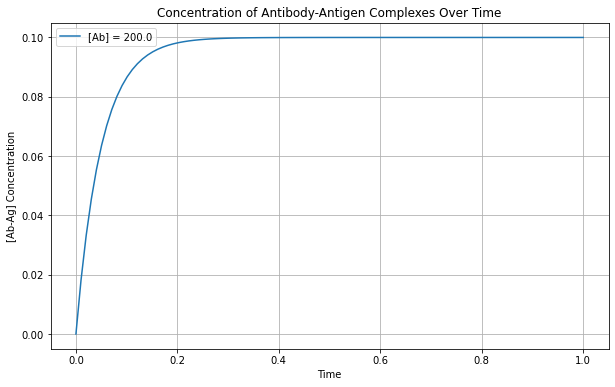

In [ ]:
# Constants
Ag_0 = 0.1  # Initial concentration of antigens
k_on = 0.1  # Association rate constant
Ab_0 = 200.0  # Fixed antibody concentration

# Time values (extended to visualize saturation)
t = np.linspace(0,1,100)

# Calculate the concentration of Ab-Ag complexes
AbAg_concentration = Ag_0 * (1 - np.exp(-k_on * Ab_0 * t))

# Plot the concentration of Ab-Ag complexes
plt.figure(figsize=(10, 6))
plt.plot(t, AbAg_concentration, label=f'[Ab] = {Ab_0}')

# Add labels and legend
plt.xlabel('Time')
plt.ylabel('[Ab-Ag] Concentration')
plt.legend()
plt.title('Concentration of Antibody-Antigen Complexes Over Time')

# Show the plot
plt.grid(True)
plt.show()